# Minták létrehozása

In [1]:
from PIL import Image, ImageDraw
import random

In [2]:
image_width = 500
image_height = 500
cell_size = 100

image = Image.new("RGB", (image_width, image_height), color="white")
draw = ImageDraw.Draw(image)

In [3]:
def resetImage(width, height, bg):
    draw.rectangle([0, 0, width, height], fill=bg)

In [4]:
def randomColor():
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    return r, g, b

0. függőleges vonalak
1. vízszintes vonalak
2. átló
3. átló másik
4. pontok
5. függőleges és víszintes vonalak

In [5]:
def addPattern(area):
    x0, y0, x1, y1 = area
    lines = [2, 4, 5, 10, 20, 25]
    choice = random.randint(0, 5)

    if choice == 0:
        for i in range(int(cell_size / 10)):
            draw.line([x0 + i * 10, y0, x0 + i * 10, y1], fill="black")
    elif choice == 1:
        for i in range(int(cell_size / 10)):
            draw.line([x0, y0 + i * 10, x1, y0 + i * 10], fill="black")
    elif choice == 2:
        d = random.choice(lines)
        for i in range(d, cell_size, d):
            draw.line([x0 + i, y0, x0, y0 + i], fill="red", width=1)
            draw.line([x1 - i, y1, x1, y1 - i], fill="red", width=1)
        draw.line([x0, y1, x1, y0], fill="red", width=1)
    elif choice == 3:
        d = random.choice(lines)
        for i in range(d, cell_size, d):
            draw.line([x0 + i, y0, x1, y1 - i], fill="green", width=1)
            draw.line([x0, y0 + i, x1 - i, y1], fill="green", width=1)
        draw.line([x0, y0, x1, y1], fill="green", width=1)
    elif choice == 4:
        density = random.randint(2, 10)
        for i in range(0, cell_size, density):
            for j in range(0, cell_size, density):
                draw.point([x0 + i, y0 + j], fill="blue")
    elif choice == 5:
        for i in range(int(cell_size / 10)):
            draw.line([x0 + i * 10, y0, x0 + i * 10, y1], fill="black")
            draw.line([x0, y0 + i * 10, x1, y0 + i * 10], fill="black")

25


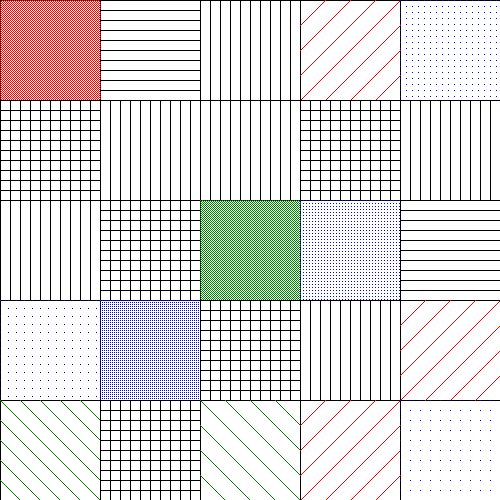

In [6]:
sectors = []
resetImage(image_width, image_height, "white")

for i in range(0, int(image_width / cell_size)):
    for j in range(0, int(image_height / cell_size)):
        x0 = i * cell_size
        y0 = j * cell_size
        x1 = i * cell_size + cell_size
        y1 = j * cell_size + cell_size
        draw.rectangle([x0, y0, x1, y1], outline="black", fill="white")
        sectors.append((x0, y0, x1, y1))

print(len(sectors))
for sector in sectors:
    addPattern(sector)

display(image)